<div style = "text-align: center; color: black; font-family: Times New Roman;">
  <strong><h1>S&P 500 MULTIPLE LINEAR REGRESSION<strong></h1>
</div>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  We will proceed running a Multiple Linear Regression analysis on the dependent variable S&P 500. We will begin by setting the libraries that we will use in this analysis:
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="display: inline-block; text-align: left;">
    <li><strong>import pandas as pd</strong>: loading in data & working with pandas data frames</li>
    <li><strong>import matplotlib.pyplot as plt</strong>: Actual vs Predicted & Residual Plots</li>
    <li><strong>import statsmodels.api as sm</strong>: conduct the OLS model</li>
    <li><strong>from sklearn.model_selection import train_test_split</strong>: split our data into test/train using shuffle = False due to time-series data</li>
    <li><strong>from sklearn.metrics import mean_squared_error</strong>: calculate MSE & RMSE scores</li>
    <li><strong>import seaborn as sns</strong>: correlation matrix plot</li>
  </ul>
</div>

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import seaborn as sns 

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Then, we will load in our data and rename column names for easier and more descriptive analysis. 
</p>

In [4]:
# Load in the data
data = pd.read_csv('merged_data.csv')

# rename columns
data.rename(columns={'CPALWE01USQ661N': 'CPI', 'S&P 500 ^GSPC': 'S&P_500', 'NASDAQ ^IXIC': 'NASDAQ', 'Dow Jones ^DJI':'Dow_Jones', 'RealInterestRate':'Real_IR', 'UnemploymentRate': 'Unemployment_Rate', 'FedFundsRate': 'Federal_Funds_Rate'}, inplace = True)
data.head(10)

,Date,S&P_500,NASDAQ,Dow_Jones,CPI,Real_IR,Unemployment_Rate,GDP_Growth,M2_Supply,Federal_Funds_Rate
0,1992-01-01,408.779999,620.210022,3223.399902,58.870052,3.198542,7.3,4.9,3398.6,4.03
1,1992-04-01,414.950012,578.679993,3359.100098,59.387717,3.789860,7.4,4.4,3434.1,3.73
2,1992-07-01,424.209991,580.830017,3393.800049,59.862244,3.353099,7.7,4.0,3407.1,3.25
3,1992-10-01,418.679993,605.169983,3226.300049,60.279252,2.728044,7.3,4.2,3413.8,3.10
4,1993-01-01,438.779999,696.340027,3310.000000,60.696260,3.267908,7.3,0.7,3455.2,3.02
5,1993-04-01,440.190002,661.419983,3427.550049,61.185166,2.774517,7.1,2.3,3438.6,2.96
6,1993-07-01,448.130005,704.700012,3539.469971,61.415239,2.591799,6.9,1.9,3450.7,3.06
7,1993-10-01,467.829987,779.260010,3680.590088,61.832248,2.398843,6.8,5.6,3449.1,2.99
8,1994-01-01,481.609985,800.469971,3978.360107,62.119840,2.772685,6.6,3.9,3502.8,3.05
9,1994-04-01,450.910004,733.840027,3681.689941,62.551227,3.659183,6.4,5.5,3507.2,3.56


<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  For our Multiple Linear Regression Analysis we will be predicting S&P 500 using macroeconomic variables CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate. We split the data into 80/20 test and train split using sklearn with shuffle being set to False due to the time-series nature of the data. The following cells will include this analysis using a full model, all macroeconomic variables, training data, and we will print the summary results in table format.
</p>

In [5]:
# Identifying dependent and independent variables
independent_variables = ['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']
dependent_variable = ['S&P_500']

x = data[independent_variables]
x_constant = sm.add_constant(x) # Adding a constant value of x
y = data[dependent_variable]

In [6]:
# Due to time-series nature, NO SHUFFLE (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS
model = sm.OLS(y_train, x_train).fit()

# printing summary results
print("==============================================================================")
print("                Full Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(model.summary())

                Full Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                S&P_500   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.03e-54
Time:                        16:30:04   Log-Likelihood:                -635.09
No. Observations:                 102   AIC:                             1284.
Df Residuals:                      95   BIC:                             1303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  For our Full Model Multiple Linear Regression analysis for S&P 500, the R-squared value is 0.935. This means that CPI, Real Interest Rate, Unemployment Rate, GDP Growth, M2 Money Supply, and Federal Funds Rate explain 93.5% of the variation of S&P 500.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  We will explore the strength and direction of the coefficients of all macroeconomic variables below, as well as whether they are statistically significant (p-value &lt; 0.05):
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="list-style-type: none; display: inline-block; text-align: left; padding-left: 0;">
    <li>&rarr; <b>CPI (coefficient = 12.928):</b> A one unit increase in CPI results in a 12.928 point increase in S&P 500. This coefficient is statistically significant with a p-value of 0.03.</li>
    <li>&rarr; <b>Real Interest Rate (coefficient = -6.15):</b> A one unit increase in the real interest rate results in a 6.15 point decrease in S&P 500. This variable is not statistically significant with a p-value of 0.861.</li>
    <li>&rarr; <b>Unemployment Rate (coefficient = -122.51):</b> A one unit increase in the unemployment rate results in a 122.51 point decrease in S&P 500. This variable is statistically significant with a p-value of 0.00.</li>
    <li>&rarr; <b>GDP Growth (coefficient = 20.23):</b> A one unit increase in GDP Growth results in a 20.23 point increase in S&P 500. This variable is statistically significant with a p-value of 0.001.</li>
    <li>&rarr; <b>M2 Money Supply (coefficient = 0.11):</b> A one unit increase in M2 Money Supply results in a 0.11 point increase in S&P 500. This variable is statistically significant with a p-value of 0.00.</li>
    <li>&rarr; <b>Federal Funds Rate (coefficient = 24.02):</b> A one unit increase in Federal Funds Rate results in a 24.02 point increase in S&P 500. This variable is not statistically significant with a p-value of 1.25.</li>
  </ul>
</div>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  After analyzing which variables are statistically significant, we will build a reduced model to more accurately predict S&P 500 with our macroeconomic variables.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  However, a caveat of Multiple Linear Regression is collinearity. Collinearity is when two or more independent variables are correlated — meaning they move together in terms of relationship. When using Multiple Linear Regression, it makes the coefficients unreliable because the model has difficulty calculating the beta values, as it cannot differentiate which variable is truly influencing the dependent variable. This makes sense given macroeconomic variables, as many use the same variables such as price level to calculate them.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Due to this, we will run a correlation matrix using seaborn to determine if any macroeconomic variables are highly correlated and then proceed.
</p>

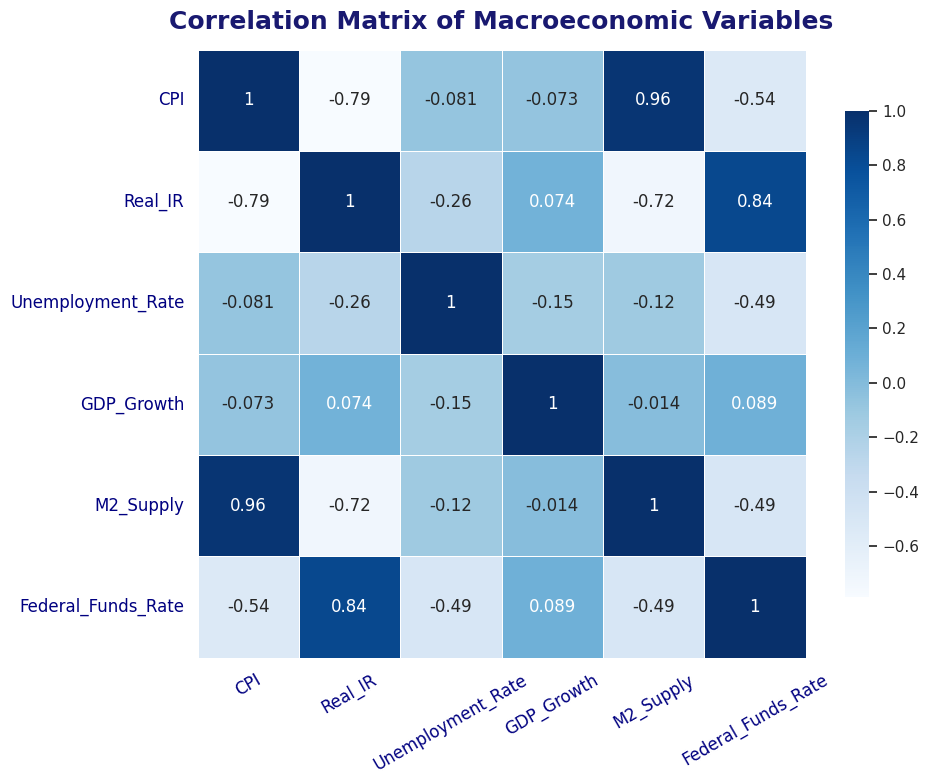

In [15]:
# Correlation matrix to define collinearity
corr_matrix = data[['CPI', 'Real_IR', 'Unemployment_Rate', 'GDP_Growth', 'M2_Supply', 'Federal_Funds_Rate']].corr()

# consulted gen ai for plot aesthetics
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
plt.figure(figsize = (10, 8))
sns.set(font = 'Times New Roman')

sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'Blues', 
            linewidths = 0.5, 
            linecolor = 'white', 
            square = True, 
            cbar_kws = {'shrink': 0.8},
            annot_kws = {"size": 12})

plt.title('Correlation Matrix of Macroeconomic Variables', fontsize = 18, fontweight = 'bold', color = 'midnightblue', pad = 15)
plt.xticks(rotation = 30, fontsize = 12, color = 'navy')
plt.yticks(rotation = 0, fontsize = 12, color = 'navy')
plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Based on the correlation coefficient matrix, the only concerning correlation coefficients are between M2 Money Supply & CPI and Federal Funds Rate & Real Interest Rate. Given our four statistically significant variables — CPI, Unemployment Rate, GDP Growth, and M2 Money Supply — we will remove CPI to hopefully improve the OLS model determining the beta values. This decision was due to CPI having a positive correlation with S&P 500, which intuitively isn't what you would expect. CPI is the Consumer Price Index and is an indicator of inflation in the United States as the price levels of market baskets change over time. Therefore, if CPI were to increase — meaning that general goods and services in a market basket go up — you would expect S&P 500 to go down, as things get more expensive and investment and borrowing also become costlier.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  After this analysis, we will proceed with a reduced Multiple Linear Regression model focusing on Unemployment Rate, GDP Growth, and M2 Money Supply.
</p>

In [8]:
# Identifying dependent and independent variables for reduced model
independent_variables_reduced = ['Unemployment_Rate', 'GDP_Growth', 'M2_Supply']

x_reduced = data[independent_variables_reduced]
x_constant = sm.add_constant(x_reduced) # Adding a constant value of x

In [9]:
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_constant, y, test_size = .20, shuffle = False)

# Running OLS for reduced model
reduced_model = sm.OLS(y_train_reduced, x_train_reduced).fit()

# printing reduced model summary results
print("==============================================================================")
print("               Reduced Model Train Multiple Linear Regression"                   )
print("==============================================================================")
print(reduced_model.summary())

               Reduced Model Train Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                S&P_500   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     385.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           4.04e-54
Time:                        16:30:07   Log-Likelihood:                -644.80
No. Observations:                 102   AIC:                             1298.
Df Residuals:                      98   BIC:                             1308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Based on our Multiple Linear Regression output for our reduced model, the R-squared value is 0.922. This means that Unemployment Rate, GDP Growth, and M2 Money Supply explain 92.2% of the variation in S&P 500. Compared to our full model, the R-squared went down slightly, as we did reduce variables which still contained some predictive power.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  The coefficient values stayed relatively the same in terms of direction; however, Unemployment Rate went up in strength, GDP Growth went down in strength, and M2 Money Supply went up in strength. This was probably due to some variables being correlated with one another, and now OLS is more confident in their beta values.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  Intuitively, the coefficient direction is parallel with economic intuition:
</p>

<div style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  <ul style="list-style-type: none; display: inline-block; text-align: left; padding-left: 0;">
    <li>&rarr; <strong>Unemployment Rate:</strong> As unemployment increases, this occurs during a contraction in the Business Cycle, which is in turn a negative impact on the overall health of the economy, and thus the stock market index of S&P 500.</li>
    <li>&rarr; <strong>GDP Growth:</strong> Strong Gross Domestic Product per year signals a growing economy, which explains an increase in S&P 500 due to higher investor optimism and corporate earnings.</li>
    <li>&rarr; <strong>M2 Money Supply:</strong> A strong M2 value signals a boost in liquidity in the economy, which alters expectations and will ultimately lead to consumers buying more, and thus increasing S&P 500.</li>
  </ul> We will then plot our Actual S&P 500 versus our Predicted S&P 500 using the test data.
</div>

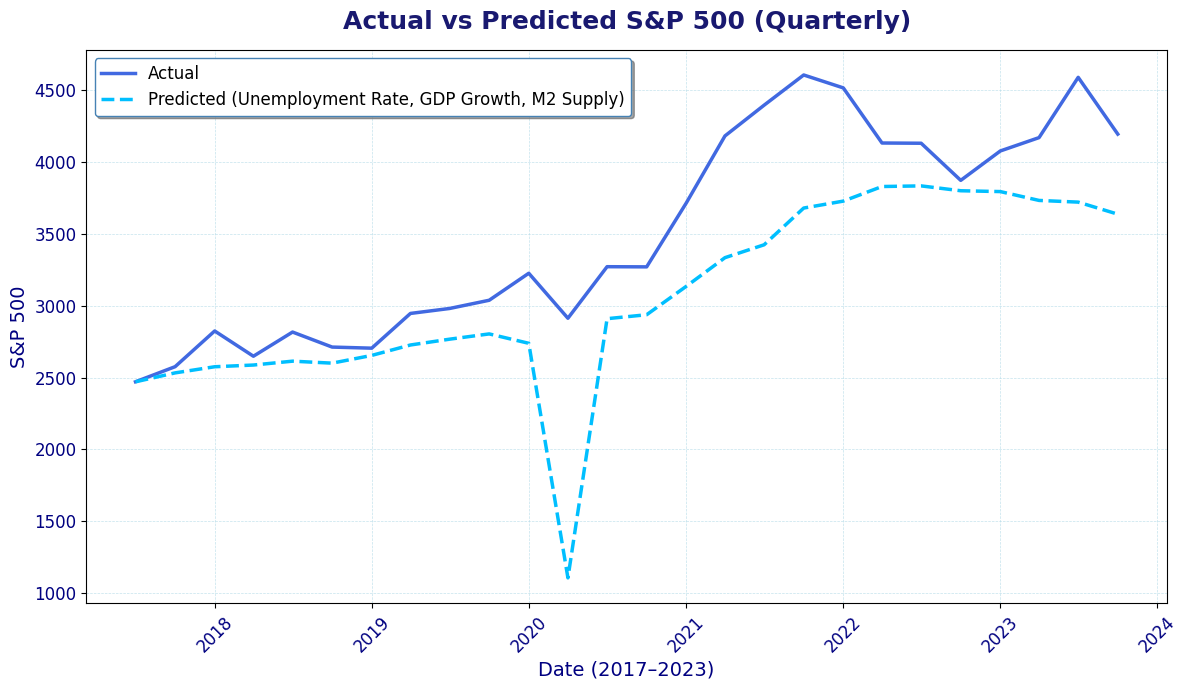

In [11]:
# Plotting our Actual versus our Reduced Model Predicted
y_pred_reduced = reduced_model.predict(x_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = mse_reduced ** 0.5

data['Date'] = pd.to_datetime(data['Date'])
dates = data['Date'].iloc[x_test.index]

# consulted gen ai for plot aesthetics
plt.figure(figsize = (12, 7))
plt.plot(dates, y_test_reduced.values, label = 'Actual', color = 'royalblue', linewidth = 2.5)
plt.plot(dates, y_pred_reduced.values, 
         label = 'Predicted (Unemployment Rate, GDP Growth, M2 Supply)', 
         color = 'deepskyblue', linewidth = 2.5, linestyle = '--')

plt.title('Actual vs Predicted S&P 500 (Quarterly)', fontsize = 18, fontweight = 'bold', pad = 15, color = 'midnightblue')
plt.xlabel('Date (2017–2023)', fontsize = 14, color = 'navy')
plt.ylabel('S&P 500', fontsize = 14, color = 'navy')
plt.xticks(rotation = 45, fontsize = 12, color = 'navy')
plt.yticks(fontsize = 12, color = 'navy')
plt.grid(visible = True, linestyle = '--', linewidth = 0.5, alpha = 0.7, color = 'lightblue')
plt.legend(loc = 'upper left', fontsize = 12, frameon = True, shadow = True, edgecolor = 'steelblue')
plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  This plot explains the actual S&P values relative to our predicted S&P values using the independent variables of Unemployment Rate, GDP Growth, and M2 Money Supply. In the earlier years prior to 2020, the model captured the general trend of S&P 500 but lacked the true magnitude. However, during 2020 with the COVID-19 pandemic, there was an extreme predicted decrease in S&P 500, probably due to sudden and extreme changes in macroeconomic variables (Unemployment Rate spiked, GDP Growth fell, and M2 Supply shifted). The model sees these extreme variable changes and predicts a massive collapse in S&P 500, when in reality there was not this drastic of a collapse in S&P 500. During 2020, there was government intervention (stimulus checks, interest rate cuts) which allowed the market to stay relatively stable due to extreme policy support that the macroeconomic variables could not have captured.
</p>

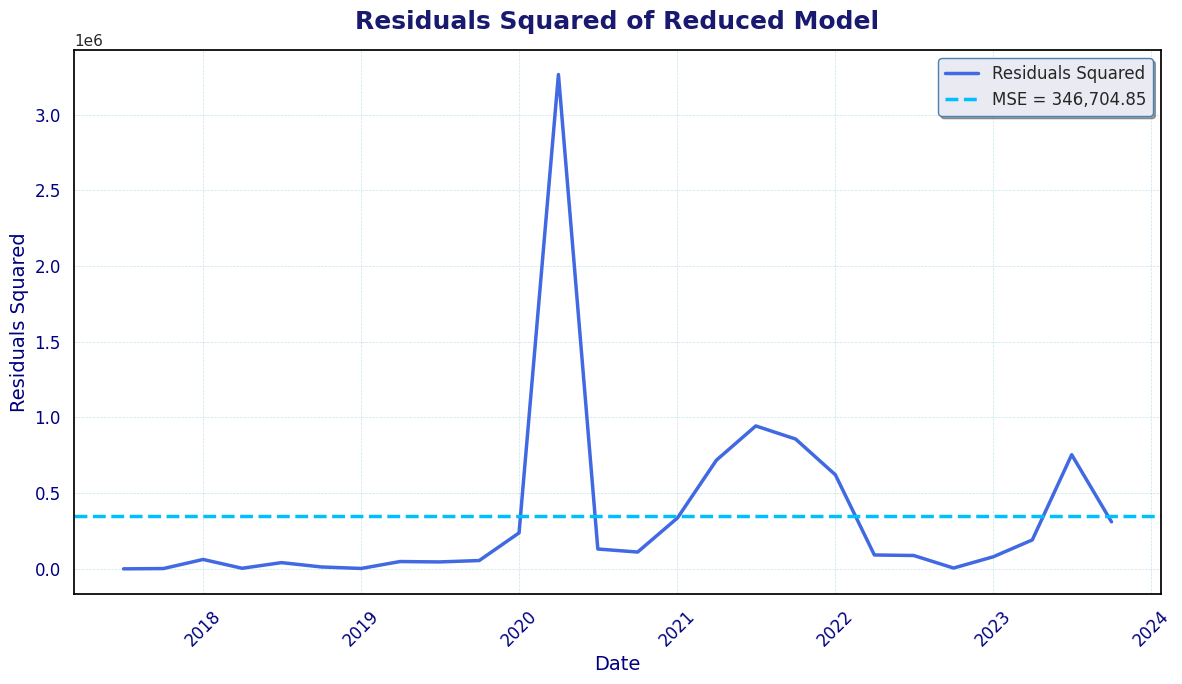

In [22]:
y_test_series_reduced = y_test.squeeze()
residuals_squared_reduced = (y_test_series_reduced - y_pred_reduced) ** 2

# Consulted gen ai for plot aesthetics
plt.figure(figsize = (12, 7))
plt.plot(dates, residuals_squared_reduced, label = 'Residuals Squared', color = 'royalblue', linewidth = 2.5)
plt.axhline(mse_reduced, label = f'MSE = {mse_reduced:,.2f}', 
            color = 'deepskyblue', linewidth = 2.5, linestyle = '--')

plt.title('Residuals Squared of Reduced Model', fontsize = 18, fontweight = 'bold', pad = 15, color = 'midnightblue')
plt.xlabel('Date', fontsize = 14, color = 'navy')
plt.ylabel('Residuals Squared', fontsize = 14, color = 'navy')
plt.xticks(rotation = 45, fontsize = 12, color = 'navy')
plt.yticks(fontsize = 12, color = 'navy')
plt.grid(visible = True, linestyle = '--', linewidth = 0.5, alpha = 0.7, color = 'lightblue')

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.25)
    spine.set_color('black')


plt.gca().set_facecolor('white')
plt.legend(loc = 'upper right', fontsize = 12, frameon = True, shadow = True, edgecolor = 'steelblue')

plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  A residual plot shows the difference between the actual and predicted values from a regression model. It helps identify periods where the model performed well versus where it struggled, particularly in finding patterns the model failed to capture.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  From 2017 to 2019, the residuals squared are consistently below the MSE line, indicating that our model — using Unemployment Rate, M2 Money Supply, and GDP Growth — predicted S&P 500 values with relatively strong accuracy.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  In 2020–2021, there is a major spike during the COVID-19 pandemic. The model struggled to predict the full extent of market stability, as macroeconomic indicators (such as rising unemployment and declining GDP) suggested a severe downturn. However, due to significant government interventions — like stimulus payments and emergency interest rate cuts — the market remained more stable than expected. These stabilizing forces were not captured by the model's macroeconomic inputs.
</p>

<p style="font-family: 'Times New Roman'; font-size: 18px; text-align: center; color: black;">
  From 2022 to 2023, residuals fluctuate slightly above and below the MSE line. While the model’s predictive accuracy declined compared to pre-pandemic years, it still maintained a reasonable ability to capture general S&P 500 trends in the post-pandemic recovery.
</p>